#### LSE Data Analytics Online Career Accelerator 

<h1 style = "text-align: center; color: #008000"> DA201: Data Analytics using Python DA301:  Advanced Analytics for Organisational Impact</h1>

## Assignment 

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews.drop(['language','platform'], axis=1, inplace=True)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)':'remuneration','spending_score (1-100)':'spending_score'}, inplace=True)

# View column names.
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)

In [9]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
reviews_clean.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [10]:
# Independent variable.
x = reviews_clean['spending_score']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_clean).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        17:50:00   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [12]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 33.0617.
# Constant coef: -75.0527.

y_pred = 33.0617 * x -75.0527

# View the output.
y_pred


0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

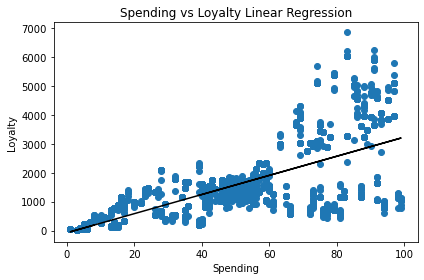

In [13]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')
plt.title("Spending vs Loyalty Linear Regression")
plt.xlabel('Spending')
plt.ylabel('Loyalty')
plt.tight_layout()
plt.savefig('spending_loyalty.png')
plt.show()

### 5b) remuneration vs loyalty

In [14]:
# Independent variable.
x = reviews_clean['remuneration']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_clean).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        17:50:09   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [16]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = 34.187825 * x - 65.686513

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

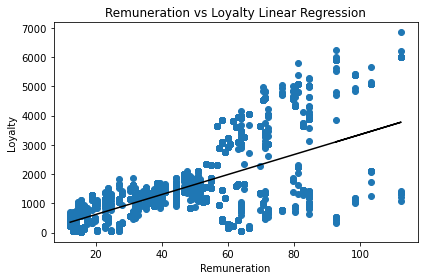

In [17]:
# Plot graph with regression line.
# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')
plt.title("Remuneration vs Loyalty Linear Regression")
plt.xlabel('Remuneration')
plt.ylabel('Loyalty')
plt.tight_layout()
plt.savefig('remuneration_loyalty.png')
plt.show()

### 5c) age vs loyalty

In [18]:
# Independent variable.
x = reviews_clean['age']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_clean).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 11 Sep 2022   Prob (F-statistic):             0.0577
Time:                        17:50:54   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [20]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = -4.012805 * x + 1736.517739

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

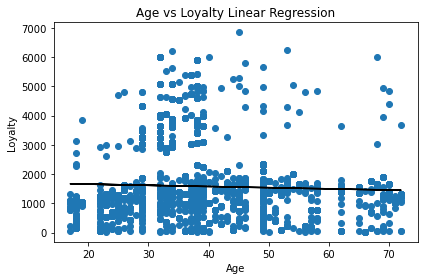

In [21]:
# Plot graph with regression line.
# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')
plt.title("Age vs Loyalty Linear Regression")
plt.xlabel('Age')
plt.ylabel('Loyalty')
plt.tight_layout()
plt.savefig('age_loyalty.png')
plt.show()

## 6. Observations and insights

<p style= "color:blue">From the graphs showing correlation and the simple linear regression line above, we can see that Age has no particular impact on loyalty points, where as Spending score and Remuneration have a positive impact on the loyalty points</p>

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [22]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [23]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [24]:
# Drop unnecessary columns.
df2 = df2[['remuneration','spending_score']]

# View DataFrame.
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [25]:
# Explore the data.
df2.shape

(2000, 2)

In [26]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

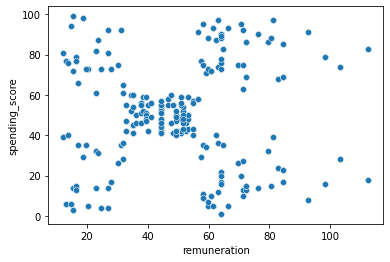

In [27]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score',
                data=df2)


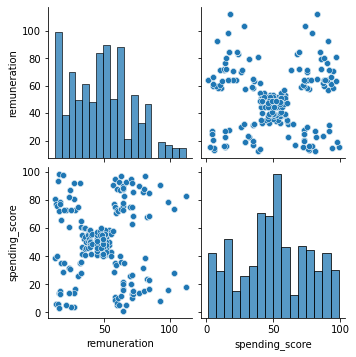

In [28]:
# Create a pairplot with Seaborn.
x = df2[['remuneration','spending_score']]
sns.pairplot(df2, vars = x)

## 3. Elbow and silhoutte methods

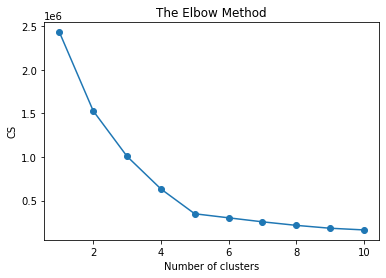

In [29]:
# Determine the number of clusters: Elbow method.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

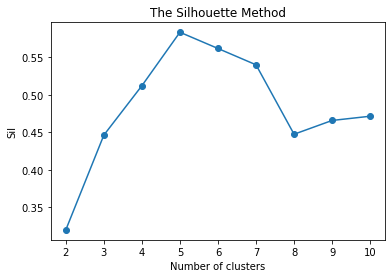

In [30]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

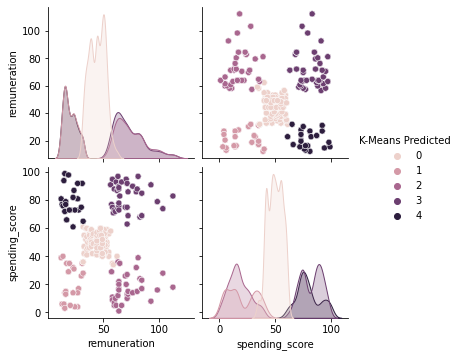

In [31]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

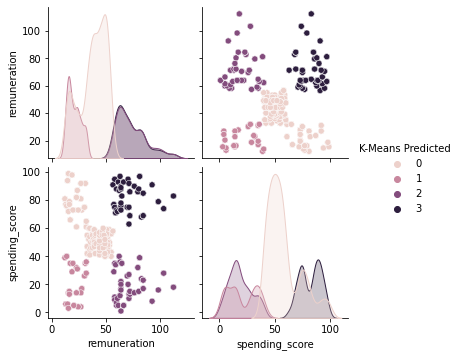

In [32]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

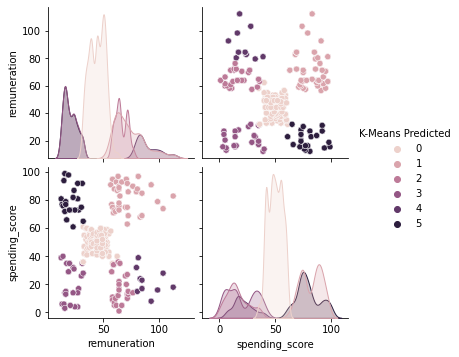

In [33]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

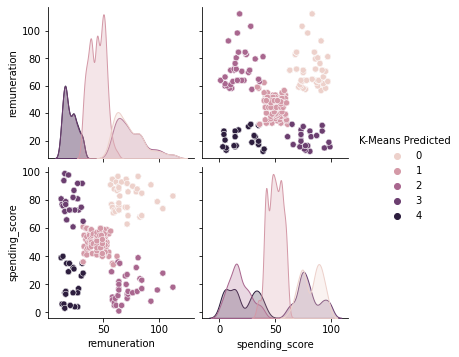

In [34]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [35]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [36]:
# View the DataFrame.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


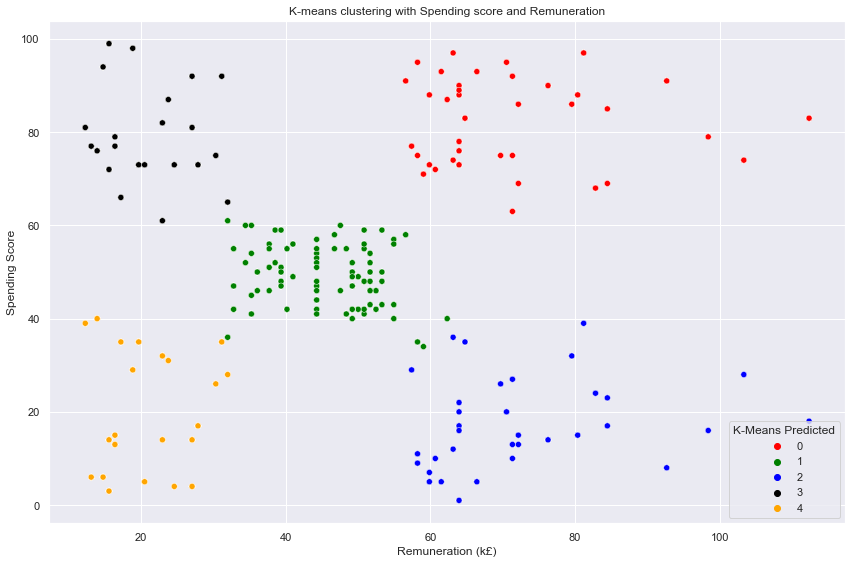

In [37]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])
plt.title("K-means clustering with Spending score and Remuneration")
plt.xlabel('Remuneration (k£)')
plt.ylabel('Spending Score')
plt.tight_layout()
plt.savefig('k_means.png')
plt.show()


## 7. Discuss: Insights and observations



<p style="color:blue"> After evaluating k-means model at different values of k, we can observe 5 clear clusters in the plot shown above. This can be used as a basis to determine customer market segments. For example customers with high remuneration and high spending score can be seen in a clear seperate cluster(red in the graph above) when compared to customer with high remuneration and low spending score(blue in above graph)</p>

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [ ]:
# nltk.download ('punkt').
# nltk.download ('stopwords').
#!pip install textblob

In [38]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [39]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [40]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review','summary']]

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [41]:
# Explore the data
df3.shape

(2000, 2)

In [42]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [43]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [44]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [45]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [46]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [47]:
df3 = df3.drop_duplicates()

df3.shape

(1961, 2)

## 3. Tokenise and create wordclouds

In [48]:
# Create new DataFrame (copy DataFrame).
df4 = df3
# View DataFrame.
df4

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


In [49]:
all_reviews = " ".join(review for review in df4.review)

In [50]:
# Review: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_review = WordCloud(width = 1600, height = 900, 
                    background_color ='white',
                    colormap = 'plasma', 
                    stopwords = 'none',
                    min_font_size = 10).generate(all_reviews) 

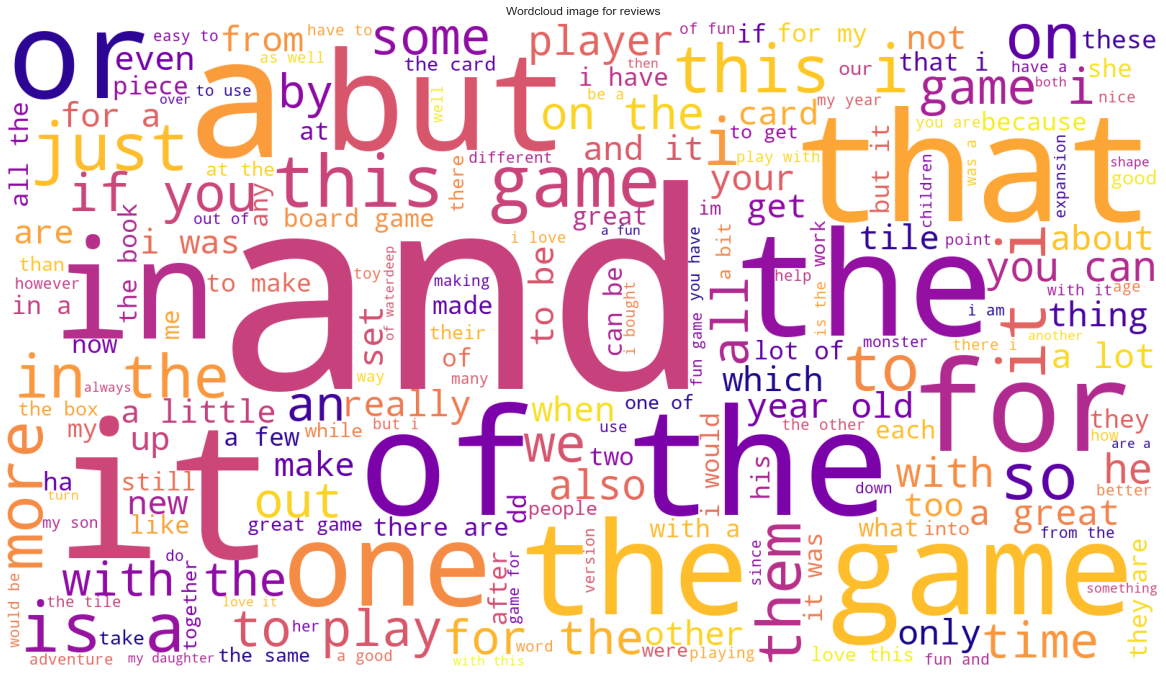

In [51]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_review) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Wordcloud image for reviews")
plt.show()

In [52]:
all_summaries = " ".join(summary for summary in df4.summary)

In [53]:
# Summary: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_summary = WordCloud(width = 1600, height = 900, 
                    background_color ='white',
                    colormap = 'plasma', 
                    stopwords = 'none',
                    min_font_size = 10).generate(all_summaries) 

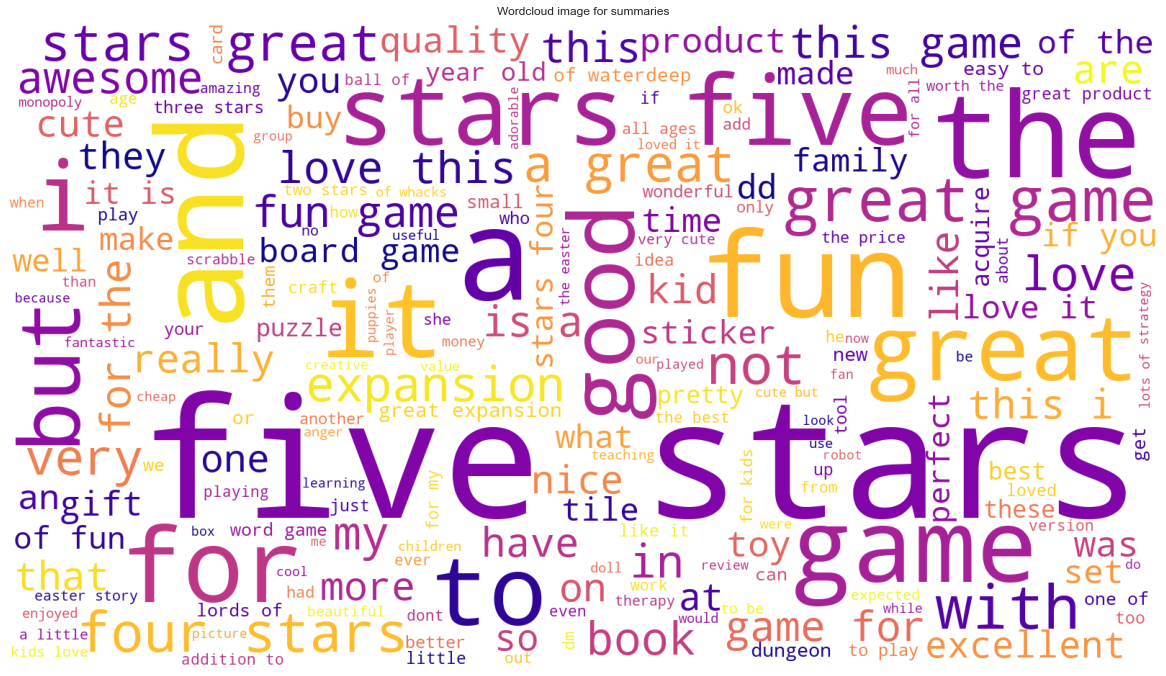

In [54]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_summary) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Wordcloud image for summaries")
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [55]:
# View shape
df4.shape

(1961, 2)

In [56]:
# Determine the frequency distribution for review column
# Tokenise the words.
df4['tokens_review'] = df4['review'].apply(word_tokenize)

# Preview data.
df4['tokens_review'].head()


0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens_review, dtype: object

In [57]:
# Preview data
df4.head()

,review,summary,tokens_review
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ..."
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o..."
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ..."


In [58]:
# Reset index for dataframe
df4 = df4.reset_index()

In [59]:
# Preview data
df4.head()

,index,review,summary,tokens_review
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ..."
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o..."
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ..."


In [60]:

# Define an empty list of tokens.
all_tokens_review = []

try:
    for i in range(df4.shape[0]):
        # Add each token to the list.
        all_tokens_review = all_tokens_review + df4['tokens_review'][i]
        #print(i)
        #all_tokens_review.append(df4['review'][i])
except KeyError:
    print("unknown exception")

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens_review)

# Preview data.
fdist

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [61]:
# Determine the frequency distribution for summary column
# Tokenise the words.
df4['tokens_summary'] = df4['summary'].apply(word_tokenize)

# Preview data.
df4['tokens_summary'].head()

# Define an empty list of tokens.
all_tokens_summary = []

try:
    for i in range(df4.shape[0]):
        # Add each token to the list.
        all_tokens_summary = all_tokens_summary + df4['tokens_summary'][i]
        #print(i)
except KeyError:
    print("unknown exception")
    
# Calculate the frequency distribution.
fdist_summary = FreqDist(all_tokens_summary)

# Preview data.
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [62]:
# Delete all the alpanum for review column
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1_review = [word for word in all_tokens_review if word.isalnum()]

In [63]:
# Remove all the stopwords for reviews

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2_review = [x for x in tokens1_review if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string_review = ''

for value in tokens2_review:
    # Add each filtered token word to the string.
    tokens2_string_review = tokens2_string_review + value + ' '

In [64]:
# Delete all the alpanum for summary column
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1_summary = [word for word in all_tokens_summary if word.isalnum()]

In [65]:
# Remove all the stopwords for summary

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2_summary = [x for x in tokens1_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string_summary = ''

for value in tokens2_summary:
    # Add each filtered token word to the string.
    tokens2_string_summary = tokens2_string_summary + value + ' '

### 4c) Create wordcloud without stopwords

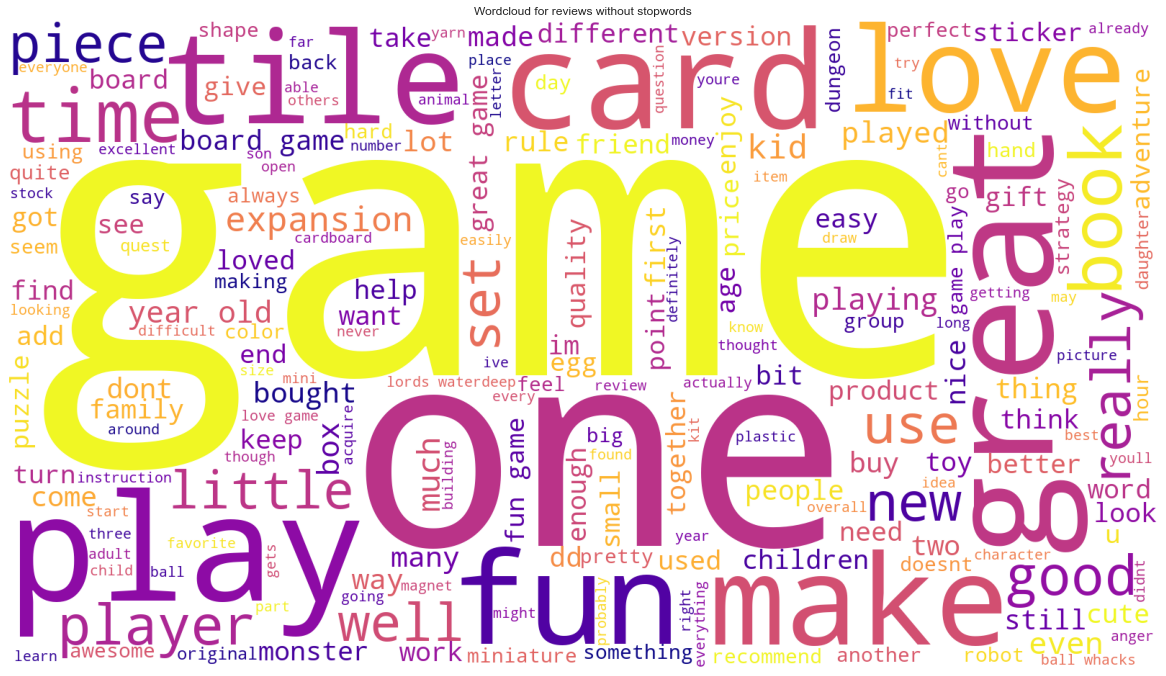

In [66]:
# Create a wordcloud without stop words for review
# Create a WordCloud.
wordcloud_review = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string_review) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0)
plt.title("Wordcloud for reviews without stopwords")
plt.savefig('wordcloud_review.png')
plt.show()


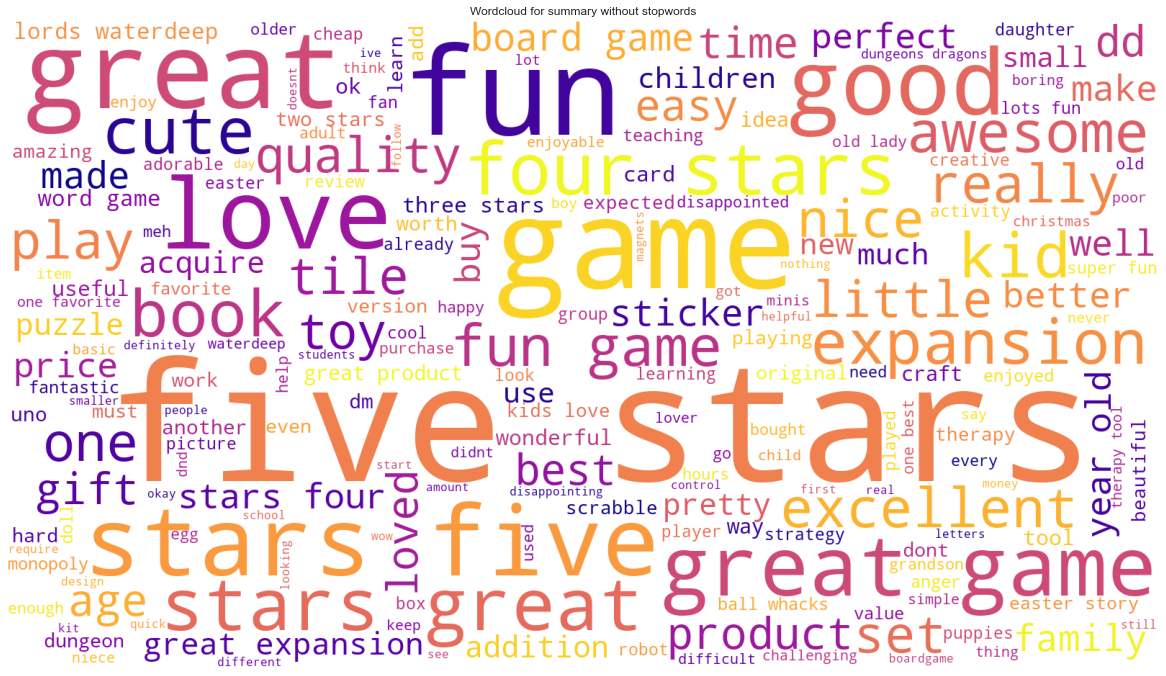

In [67]:
# Create a wordcloud without stop words for summary
# Create a WordCloud.
wordcloud_summary = WordCloud(width = 1600, height = 900, 
                    background_color ='white', 
                    colormap='plasma', 
                    min_font_size = 10).generate(tokens2_string_summary) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.title("Wordcloud for summary without stopwords")
plt.savefig('wordcloud_summary.png')
plt.show()


In [68]:
# view dataframe 
df4.head()

,index,review,summary,tokens_review,tokens_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


### 4d) Identify 15 most common words and polarity

In [69]:
# Determine the 15 most common words for review
# View the frequency distribution.
fdist1_review = FreqDist(tokens2_review)

# Preview the data.
fdist1_review

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [70]:
# Import the Counter class.
#from collections import Counter

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens2_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


In [71]:
# Create dataframe to plot the graph
counts_review_plot = counts_review.reset_index()

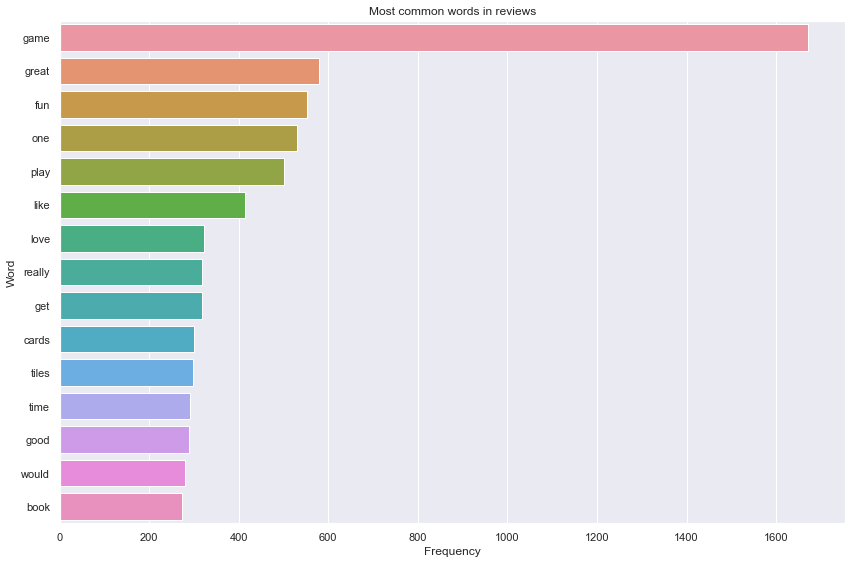

In [72]:
# Plot a graph to show most common words in review column
sns.barplot(x="Frequency", y="Word", data=counts_review_plot)
plt.title("Most common words in reviews")
plt.savefig('common_reviews.png')
plt.tight_layout()
plt.show()

In [73]:
# Determine the 15 most common words for summary
# View the frequency distribution.
fdist1_summary = FreqDist(tokens2_summary)

# Preview the data.
fdist1_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [74]:
# Import the Counter class.
#from collections import Counter

# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens2_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


In [75]:
# Create a dataframe to plot a graph
counts_summary_plot = counts_summary.reset_index()

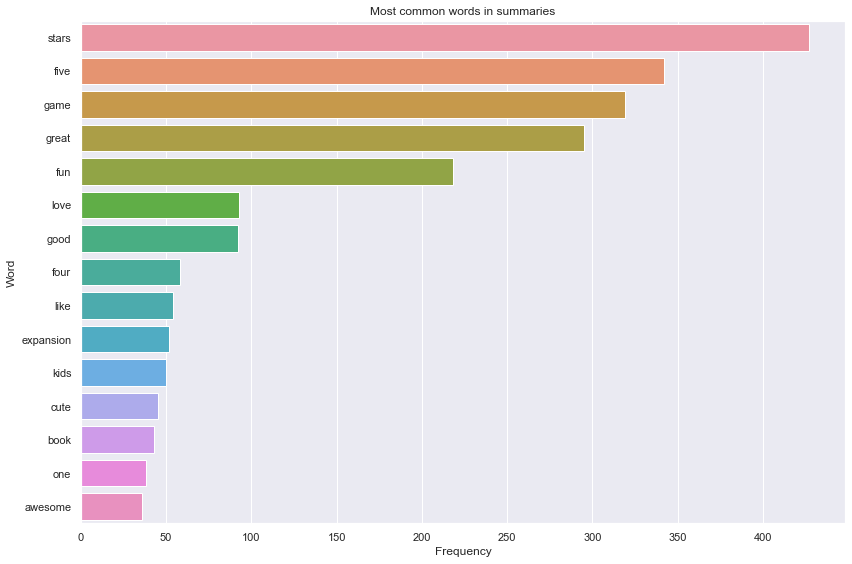

In [76]:
# Plot a graph to show most common words in summary column
sns.barplot(x="Frequency", y="Word", data=counts_summary_plot)
plt.title("Most common words in summaries")
plt.savefig('common_summary.png')
plt.tight_layout()
plt.show()

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [77]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [78]:
# Determine polarity of both columns. 
df4['polarity_review'] = df4['review'].apply(generate_polarity)
df4['polarity_summary'] = df4['summary'].apply(generate_polarity)

# View output.
print(df4['polarity_review'].head())
print(df4['polarity_summary'].head())

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64
0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64


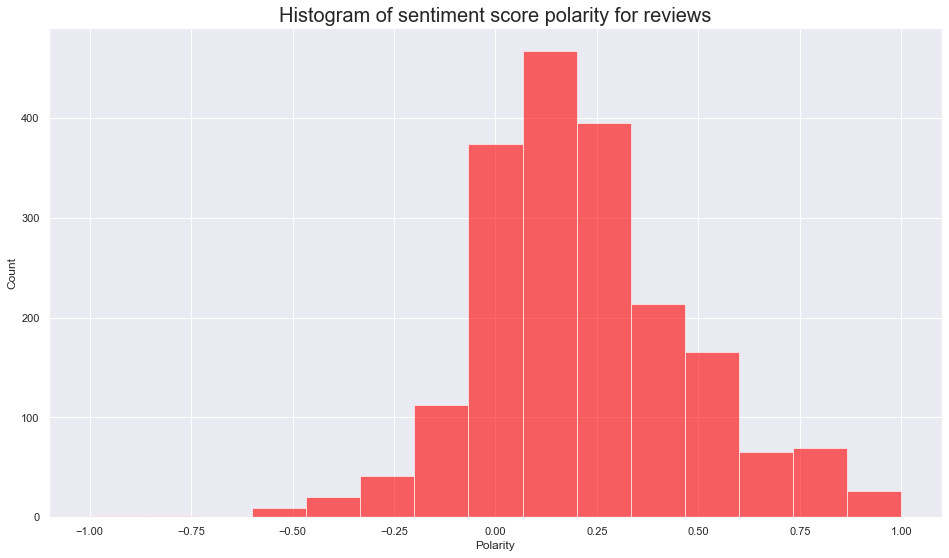

In [79]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for reviews', fontsize=20)
plt.savefig('histogram_review.png')
plt.show();

# Histogram of sentiment score


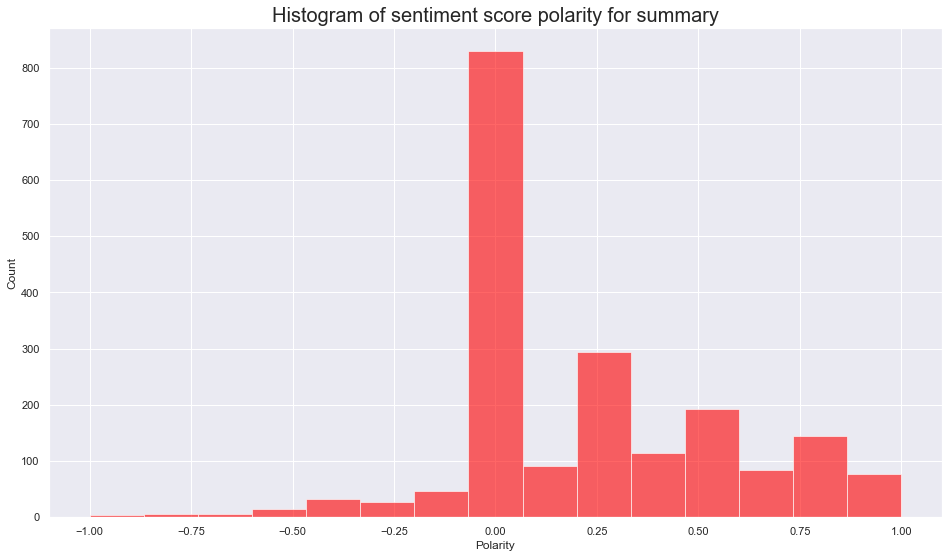

In [80]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins_summary = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_summary'], num_bins_summary, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summary', fontsize=20)
plt.savefig('histogram_summary.png')
plt.show();


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [81]:
negative_sentiment_review = df4.nsmallest(20, 'polarity_review')
negative_sentiment_review_df = negative_sentiment_review[['review', 'polarity_review']]
negative_sentiment_review_df

,review,polarity_review
207,booo unles you are patient know how to measure...,-1.000000
181,incomplete kit very disappointing,-0.780000
1773,im sorry i just find this product to be boring...,-0.583333
362,one of my staff will be using this game soon s...,-0.550000
116,i bought this as a christmas gift for my grand...,-0.500000
226,this was a gift for my daughter i found it dif...,-0.500000
229,i found the directions difficult,-0.500000
289,instructions are complicated to follow,-0.500000
300,difficult,-0.500000
1501,expensive for what you get,-0.500000


In [82]:
negative_sentiment_summary = df4.nsmallest(20, 'polarity_summary')
negative_sentiment_summary_df = negative_sentiment_summary[['summary', 'polarity_summary']]
negative_sentiment_summary_df

,summary,polarity_summary
21,the worst value ive ever seen,-1.000000
207,boring unless you are a craft person which i am,-1.000000
819,boring,-1.000000
1148,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
143,disappointed,-0.750000
623,disappointed,-0.750000
785,disappointed,-0.750000
1591,disappointed,-0.750000
361,promotes anger instead of teaching calming met...,-0.700000


In [83]:
positive_sentiment_review = df4.nlargest(20, 'polarity_review')
positive_sentiment_review_df = positive_sentiment_review[['review', 'polarity_review']]
positive_sentiment_review_df

,review,polarity_review
7,came in perfect condition,1.0
164,awesome book,1.0
193,awesome gift,1.0
489,excellent activity for teaching selfmanagement...,1.0
517,perfect just what i ordered,1.0
583,wonderful product,1.0
601,delightful product,1.0
613,wonderful for my grandson to learn the resurre...,1.0
782,perfect,1.0
923,awesome,1.0


In [84]:
positive_sentiment_summary = df4.nlargest(20, 'polarity_summary')
positive_sentiment_summary_df = positive_sentiment_summary[['summary', 'polarity_summary']]
positive_sentiment_summary_df

,summary,polarity_summary
6,best gm screen ever,1.0
28,wonderful designs,1.0
32,perfect,1.0
80,theyre the perfect size to keep in the car or ...,1.0
133,perfect for preschooler,1.0
139,awesome sticker activity for the price,1.0
160,awesome book,1.0
162,he was very happy with his gift,1.0
186,awesome,1.0
209,awesome and welldesigned for 9 year olds,1.0


## 7. Discuss: Insights and observations



<p style="color:blue">Observing the wordclouds for review and summary columns along with the graphs for most common words in both the columns, we can see that the common words are mostly positive. The histograms of sentiment score for both review and summary columns also show the polarity to be mostly positive. Top 20 negative and positive reviews and summaries have been listed to help for further analysis.</p>

# 